In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.datasets import make_regression

plt.rcParams["figure.figsize"] = (20, 20)

In [2]:
def display_image(image_array):
    display(Image.fromarray(image_array))

def imread_rgb(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

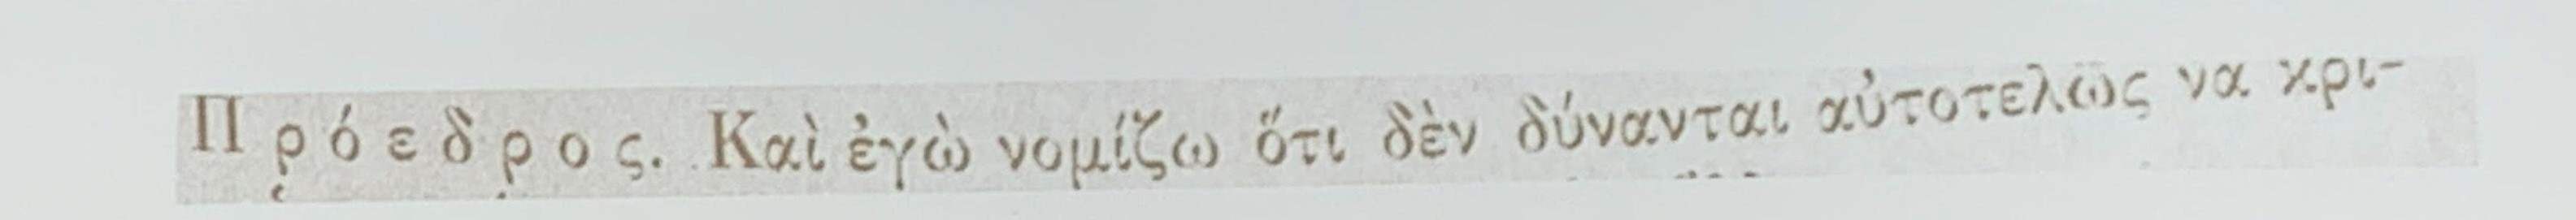

In [3]:
image = imread_rgb("img/unnamed.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
display_image(image)

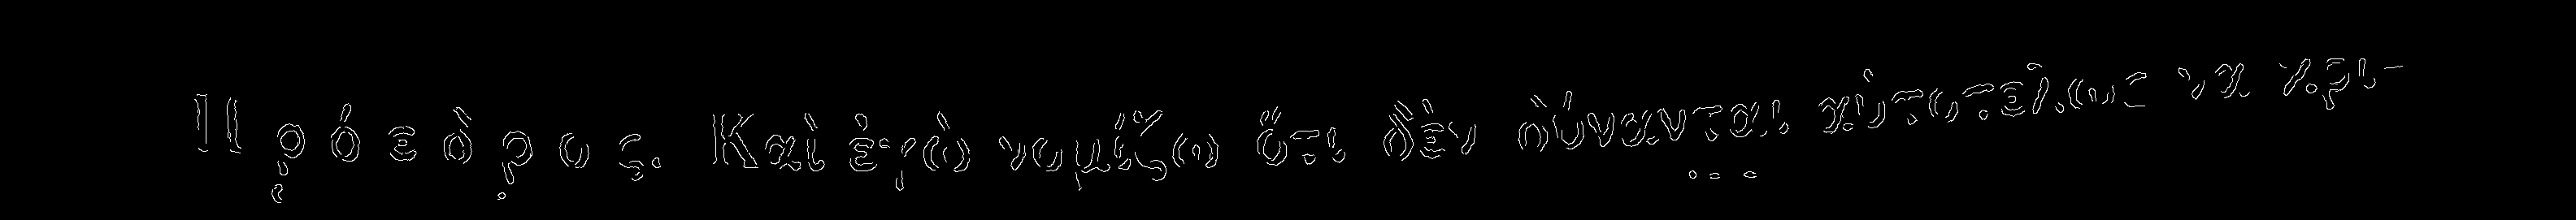

In [4]:
gray = cv2.medianBlur(gray, ksize=5)
edges = cv2.Canny(gray, threshold1=120, threshold2=180, apertureSize=3)
display_image(edges)

In [5]:
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi / 180,
    threshold=160,
    minLineLength=5,
    maxLineGap=100
)
print(type(lines))
print(lines.shape)

<class 'numpy.ndarray'>
(2, 1, 4)


In [6]:
lines = np.squeeze(lines)
print(lines.shape)

(2, 4)


In [7]:
print("first line:")
print(f"x0 = {lines[0][0]}, y0 = {lines[0][1]}")
print(f"x1 = {lines[0][2]}, y1 = {lines[0][3]}")

first line:
x0 = 915, y0 = 205
x1 = 2921, y1 = 100


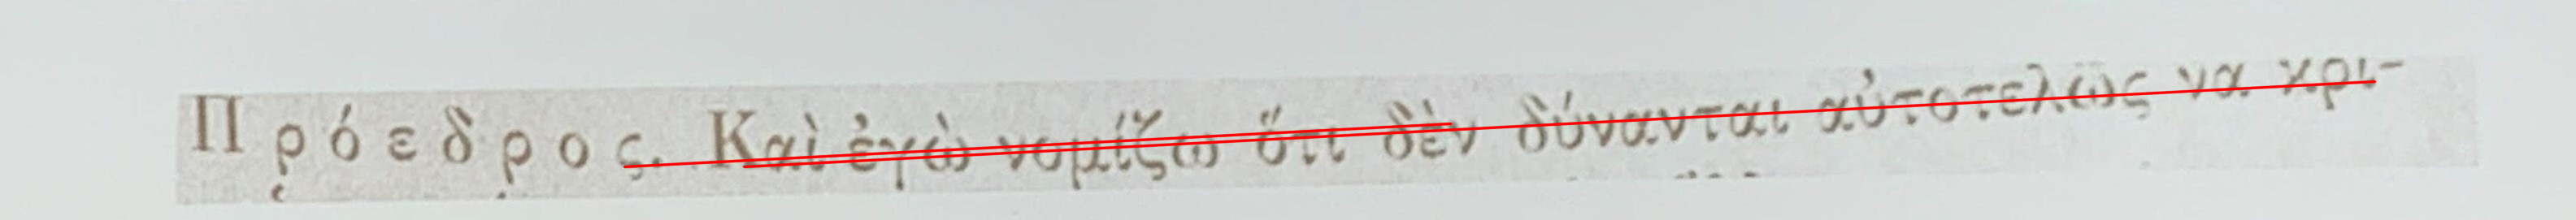

In [8]:
for line in lines:
    x0 = line[0]
    y0 = line[1]
    x1 = line[2]
    y1 = line[3]
    
    cv2.line(image, pt1=(x0, y0), pt2=(x1, y1), color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
    
display_image(image)

original image shape:  (271, 3169, 3)


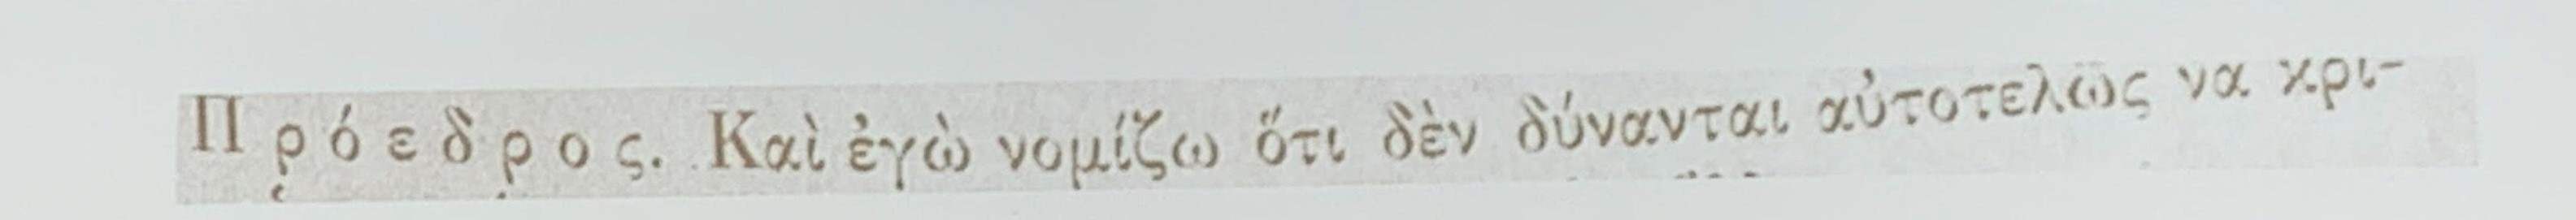

In [9]:
image = imread_rgb("img/unnamed.jpg")
print("original image shape: ", image.shape)
display_image(image)

resized image shape:  (136, 1584, 3)


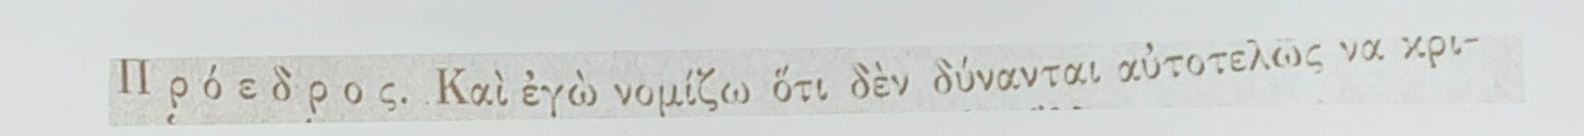

In [10]:
resized = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
print("resized image shape: ", resized.shape)
display_image(resized)

In [13]:
height, width, _ = image.shape

ty = 500
tx = 400

M = np.float32([[1, 0, tx],
               [0, 1, ty]])

print(M)

[[  1.   0. 400.]
 [  0.   1. 500.]]


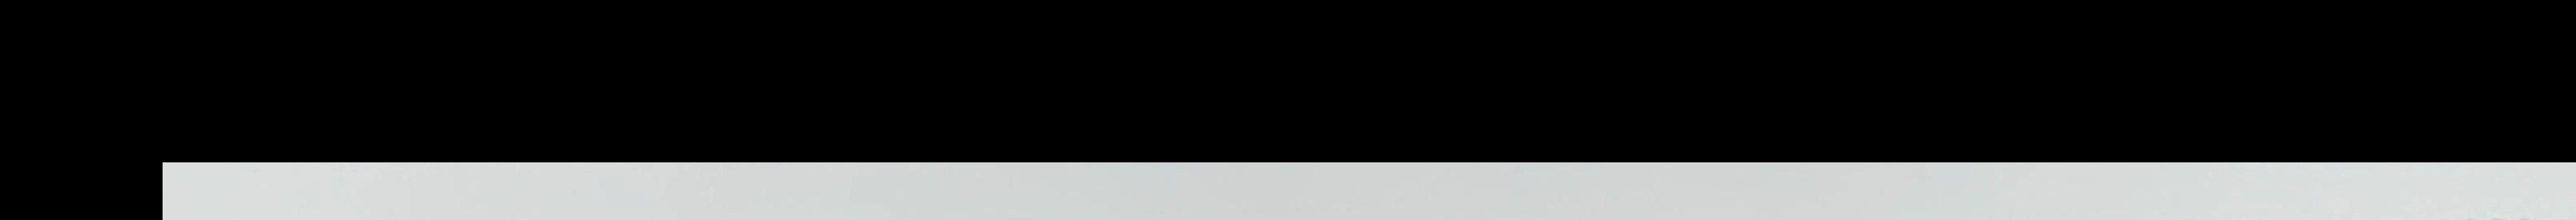

In [12]:
output = cv2.warpAffine(image, M, (width, height))

display_image(output)

In [14]:
image_center = (width / 2, height / 2) 

angle = 45
scale = 1

M = cv2.getRotationMatrix2D(center=image_center, angle=angle, scale=scale)
print(M)

[[ 7.07106781e-01  7.07106781e-01  3.68276336e+02]
 [-7.07106781e-01  7.07106781e-01  1.16009773e+03]]


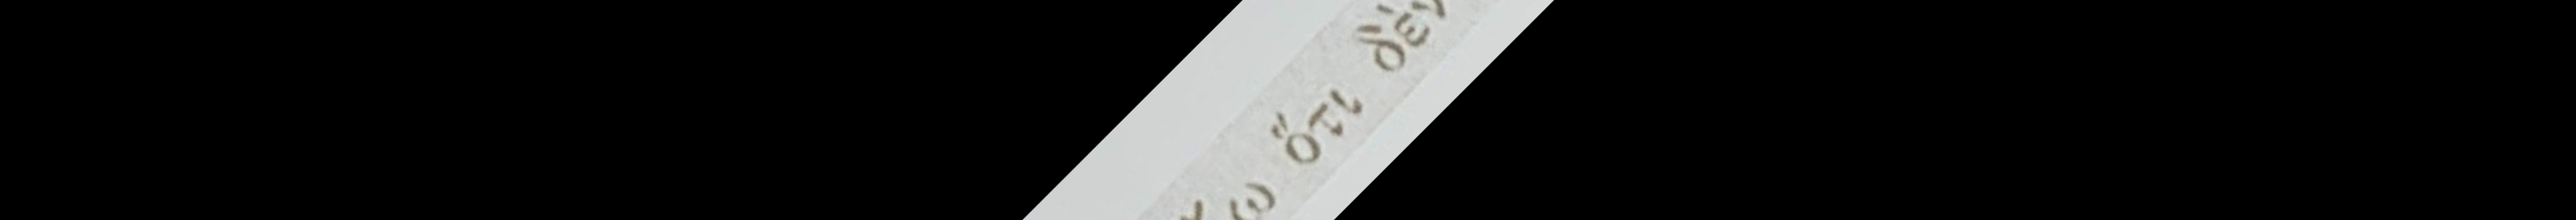

In [15]:
output = cv2.warpAffine(image, M, (width, height))

display_image(output)

In [16]:
pts_1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts_2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts_1, pts_2)
print(M)

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


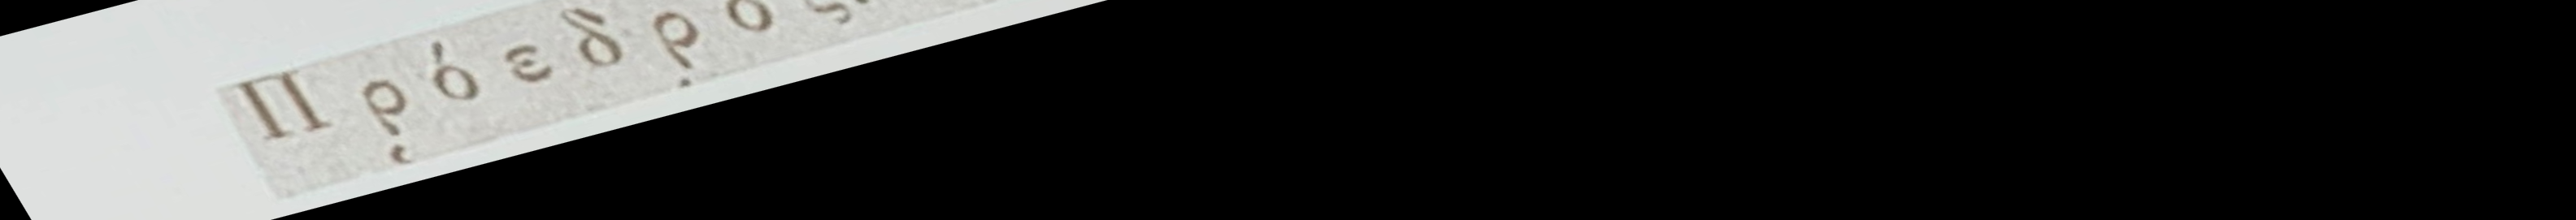

In [17]:
output = cv2.warpAffine(image, M, (width, height))

display_image(output)

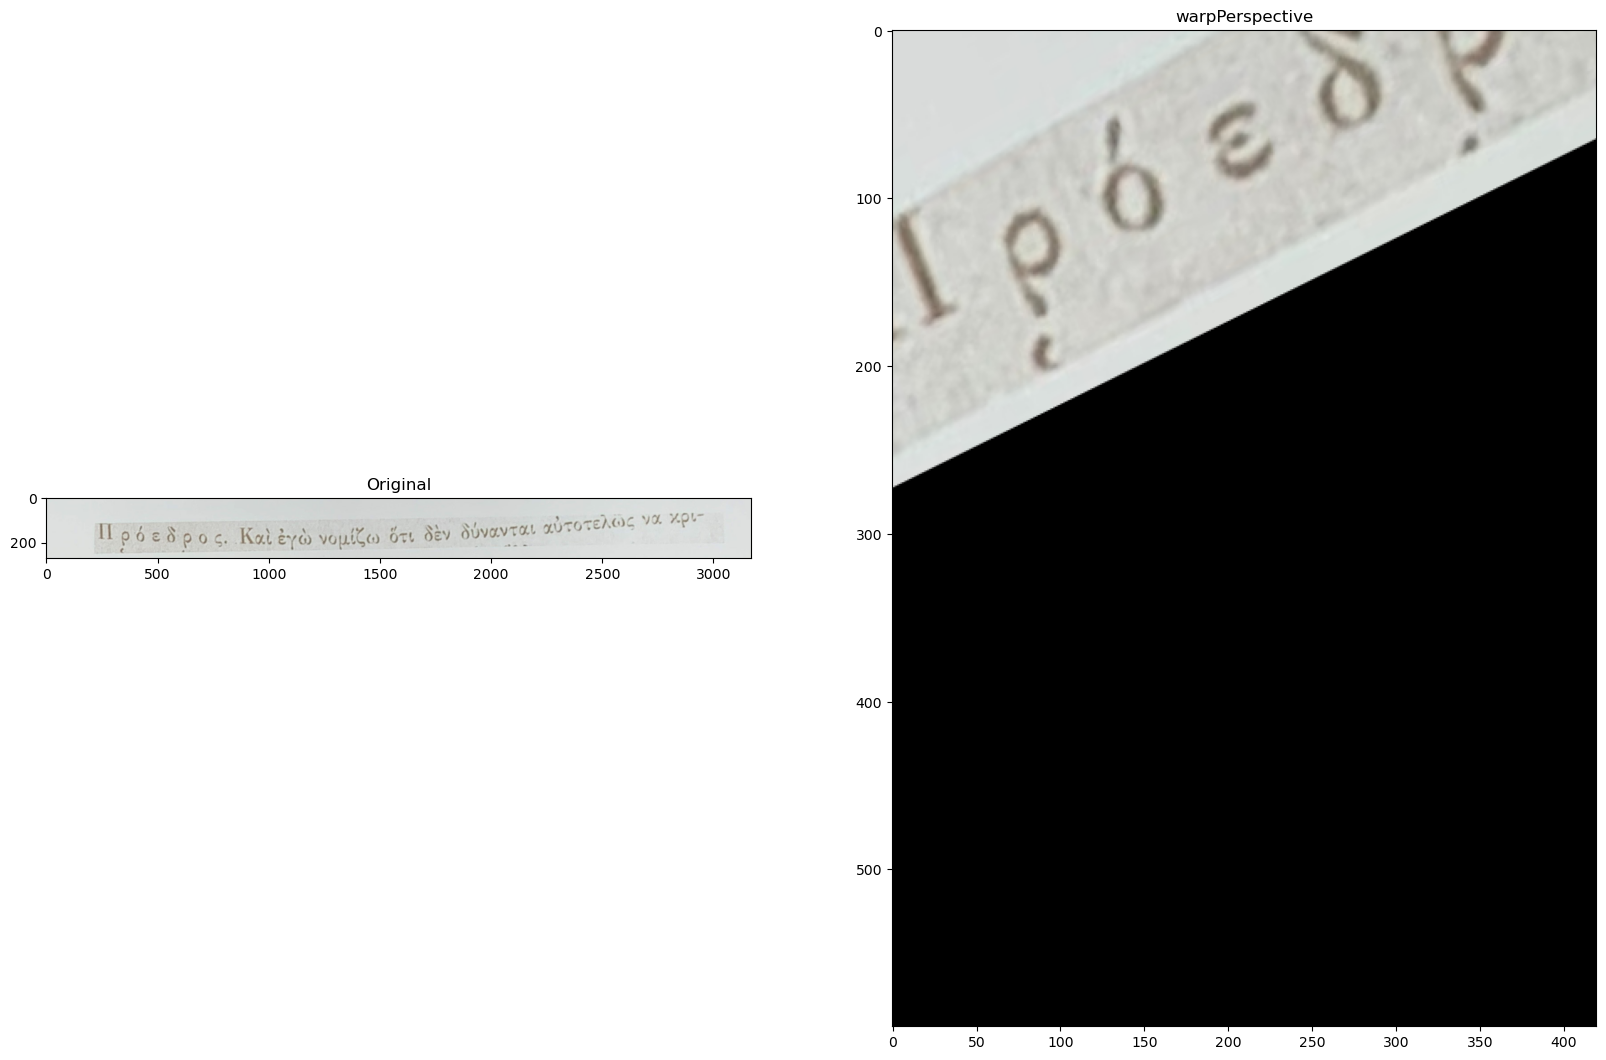

In [18]:
image = cv2.imread('img/unnamed.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
M = cv2.getPerspectiveTransform(points_A, points_B)
warped = cv2.warpPerspective(image, M, (420,594))
plt.subplot(1, 2, 2)
plt.title("warpPerspective")
plt.imshow(warped)

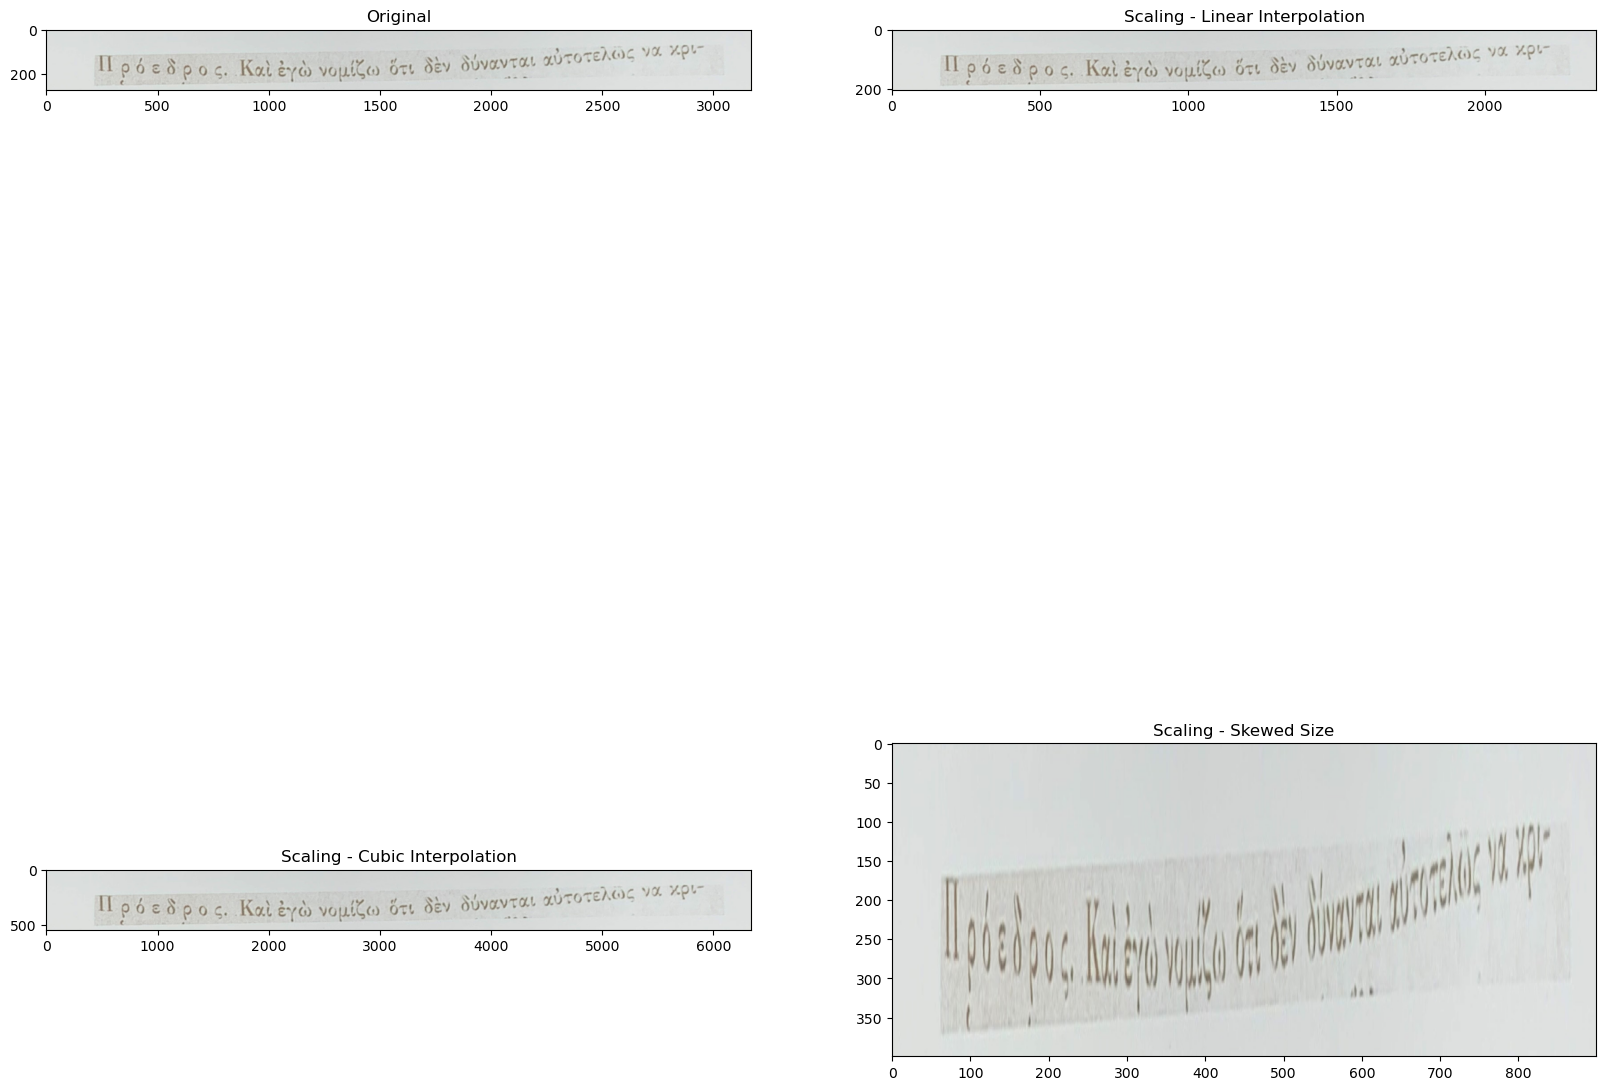

In [19]:
image = cv2.imread('img/unnamed.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)
img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

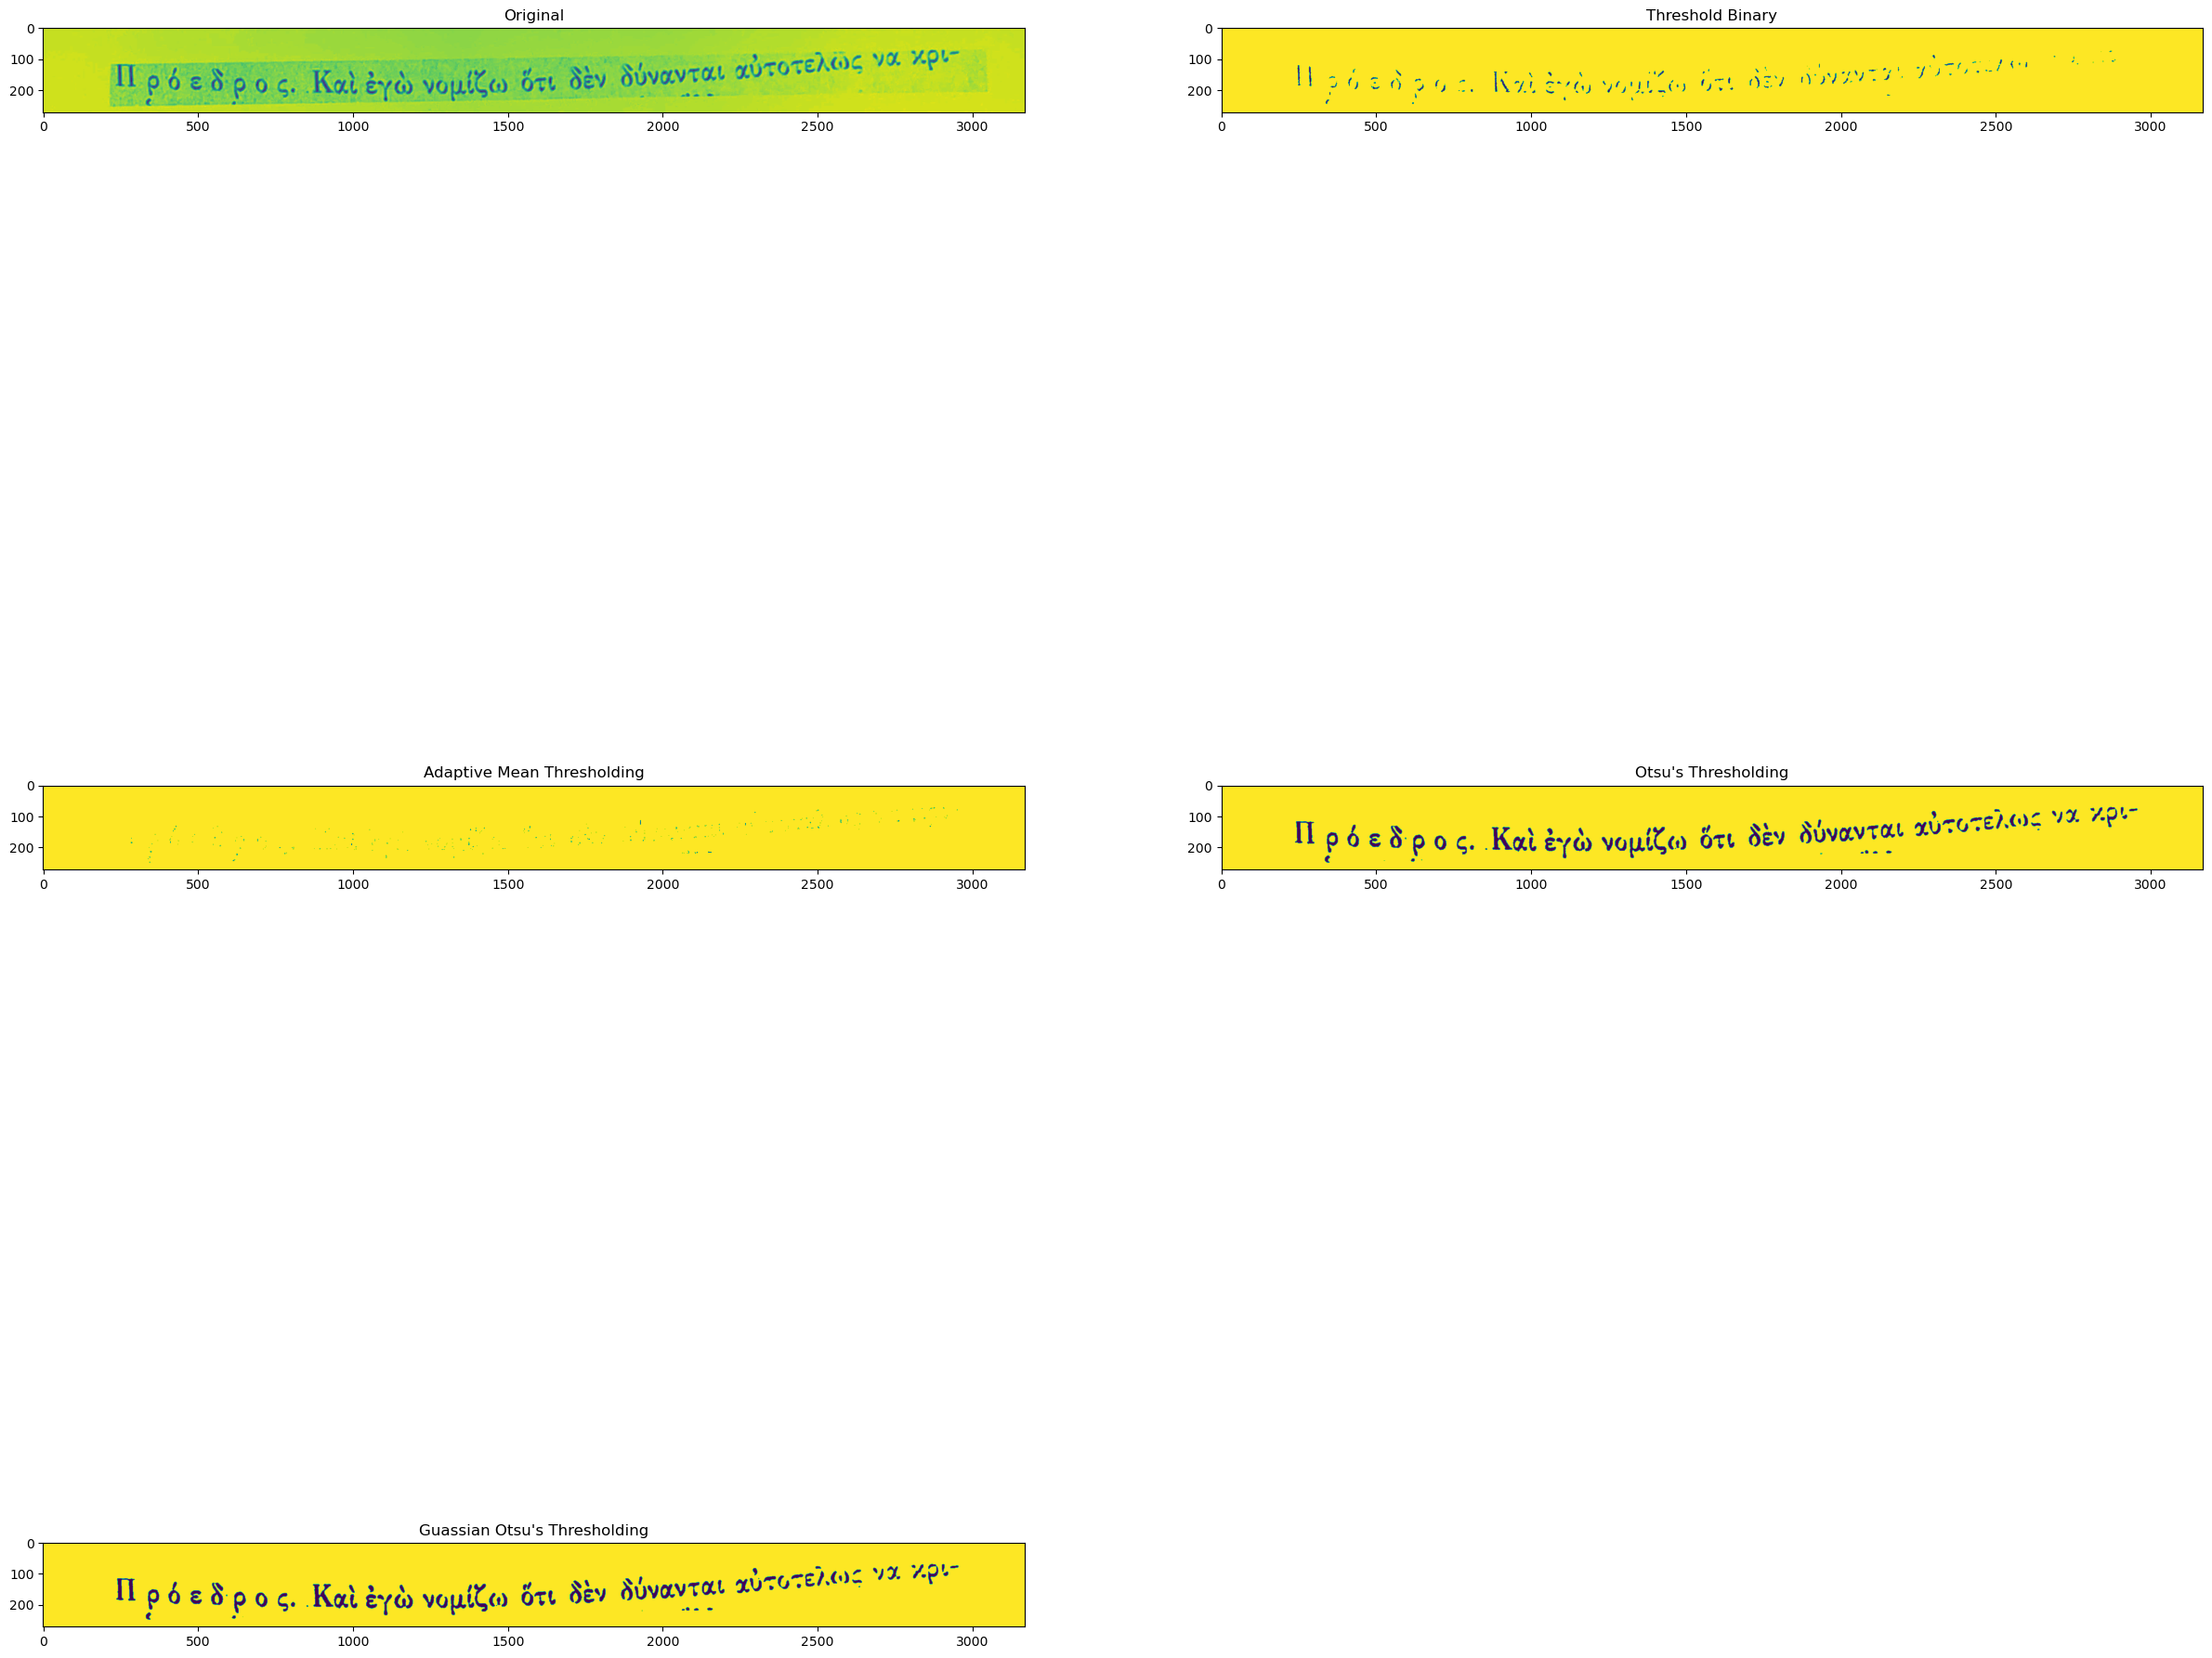

In [20]:
# Load our new image
image = cv2.imread('img/unnamed.jpg', 0)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)
image = cv2.GaussianBlur(image, (3, 3), 0)
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2)
plt.subplot(3, 2, 5)
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

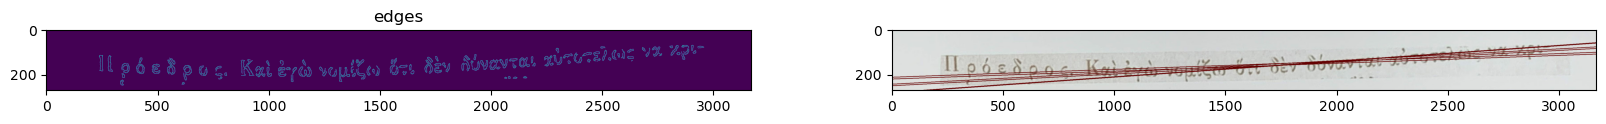

In [21]:
# Load the image
image = cv2.imread('img/unnamed.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Canny Edges
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)
plt.subplot(2, 2, 1)
plt.title("edges")
plt.imshow(edges)
# Run HoughLines Fucntion 
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
# Run for loop through each line
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x_1 = int(x0 + 3500 * (-b))
    y_1 = int(y0 + 3500 * (a))
    x_2 = int(x0 - 3500 * (-b))
    y_2 = int(y0 - 3500 * (a))
    cv2.line(image, (x_1, y_1), (x_2, y_2), (100, 0, 0), 2)
# Show Final output
plt.subplot(2, 2, 2)
plt.imshow(image)